<a href="https://colab.research.google.com/github/eleven111101/Logistic_Regression01/blob/main/LoR_Irisflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello_world")

hello_world


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/IRIS.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df["species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [9]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df["species"] = df["species"].apply(lambda x: int(1 if x == "Iris-setosa" else (2 if x == "Iris-versicolor" else 3)))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
X=df.drop("species",axis=1)
Y=df["species"]

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
X_train.shape , Y_train.shape

((100, 4), (100,))

In [27]:
X_test.shape , Y_test.shape

((50, 4), (50,))

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train = scaler.transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_test

array([[ 0.34288234, -0.497631  ,  0.51155872, -0.02416432],
       [-0.13835603,  1.91805346, -1.22646639, -1.2323802 ],
       [ 2.26783585, -0.98076789,  1.78611047,  1.45254398],
       [ 0.22257275, -0.25606255,  0.39569038,  0.37857431],
       [ 1.1850495 , -0.497631  ,  0.56949289,  0.2443281 ],
       [-0.49928482,  0.95177968, -1.34233473, -1.09813399],
       [-0.25866563, -0.25606255, -0.12571715,  0.11008189],
       [ 1.30535909,  0.22707434,  0.7432954 ,  1.45254398],
       [ 0.46319194, -1.94704167,  0.39569038,  0.37857431],
       [-0.01804644, -0.73919944,  0.04808536, -0.02416432],
       [ 0.82412072,  0.46864278,  0.7432954 ,  1.04980535],
       [-1.22114238, -0.01449411, -1.4002689 , -1.50087261],
       [-0.37897522,  1.19334812, -1.45820307, -1.36662641],
       [-1.10083279,  0.22707434, -1.34233473, -1.50087261],
       [-0.8602136 ,  1.91805346, -1.34233473, -1.2323802 ],
       [ 0.58350153,  0.71021123,  0.51155872,  0.51282052],
       [ 0.82412072, -0.

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [41]:
model.fit(X_train,Y_train)

LogisticRegression()

In [42]:
prediction = model.predict(X_test)

In [43]:
prediction

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [46]:
np_Y_test = np.array(Y_test)

In [47]:
np_Y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [48]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [50]:
print(classification_report(Y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [51]:
accuracy_score(Y_test,prediction)

0.98

In [52]:
confusion_matrix(Y_test,prediction)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     150 non-null    float64
 1   sepal_width      150 non-null    float64
 2   petal_length     150 non-null    float64
 3   petal_width      150 non-null    float64
 4   species          150 non-null    int64  
 5   species_numeric  150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [56]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000,1.000000
species_numeric,0.782561,-0.419446,0.949043,0.956464,1.000000,1.000000


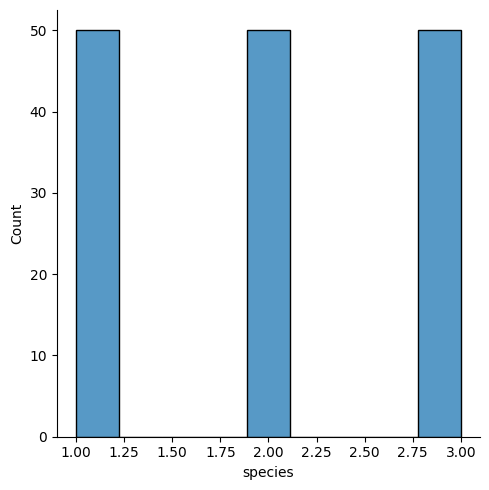

In [57]:
sns.displot(df["species"])

<Axes: >

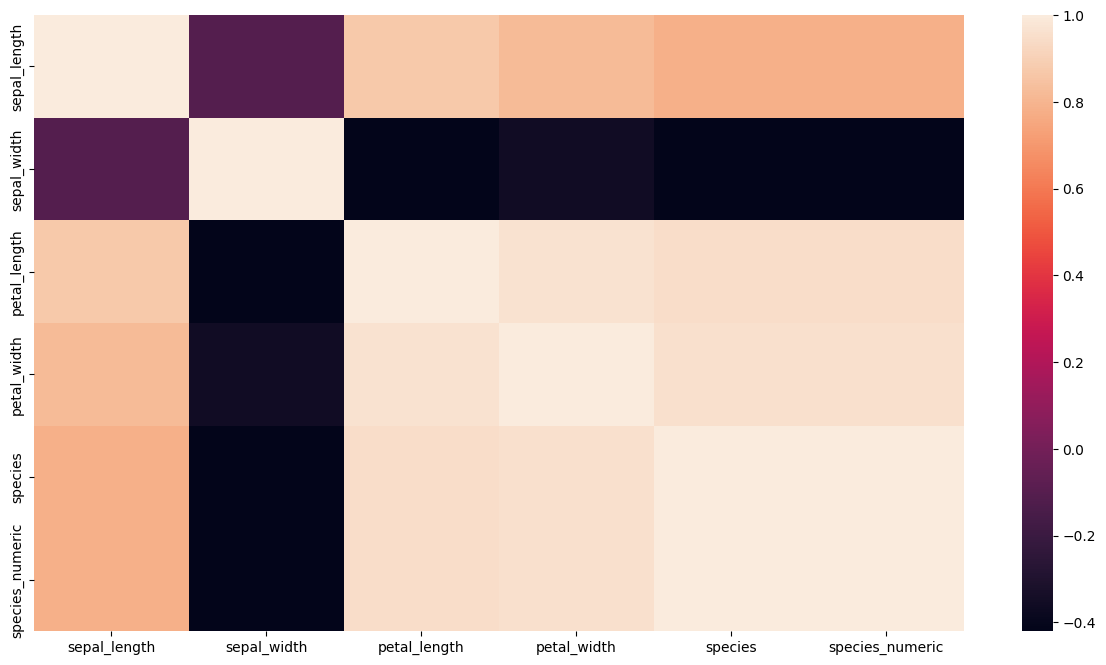

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())